# Deep learning in Tree species classification Tutorial

<table class="tfo-notebook-buttons" align="left" width=90%>
  <td width=30% align="left">     <a target="_blank" href="https://colab.research.google.com/github/yuwei-cao-git/DRI-EDIA-F4A/blob/main/src/tree_species_classification/tree_species_classification.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">Run in Google Colab </a> </td>
  <td width=30% align="left">     <a target="_blank" href="https://github.com/yuwei-cao-git/DRI-EDIA-F4A/blob/main/src/tree_species_classification/tree_species_classification.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">View on Github</a> </td>
  <td width=30% align="left">     <a href="https://drive.google.com/uc?id=1I8Lb3mAlkrUSSmdTyLQPQ52HhsGbF6qX"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">Download Data</a> </td>
</table>

---

⚛ **Workflow**

1. Set up the Dataset
2. Create a model
3. Train
4. Test/Visualize result
5. Tune the network
6. Save/Depoly your model
7. Scale up your model

---

# Install and load required packages

In [1]:
#Uncomment this line to install packages
%pip install lightning gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
import shutil
import lightning as L
from PIL import Image
import torchvision.transforms as transforms
from torchvision.models import resnet50, ResNet50_Weights
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch.loggers import TensorBoardLogger
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
import pandas as pd
import geopandas as gpd
from sklearn.model_selection import train_test_split
from PIL import Image
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix
import sklearn

---

# Download data

In [3]:
#Download the zipped tree crown data
!gdown 1svN8wVUmgvyQeOgj_NZkQtp7m7ehUEu2

Downloading...
From (original): https://drive.google.com/uc?id=1svN8wVUmgvyQeOgj_NZkQtp7m7ehUEu2
From (redirected): https://drive.google.com/uc?id=1svN8wVUmgvyQeOgj_NZkQtp7m7ehUEu2&confirm=t&uuid=838b7409-b953-467a-87d7-67dc2d33cf5e
To: /content/qc_crowns.zip
100% 69.0M/69.0M [00:01<00:00, 47.2MB/s]


In [4]:
#Remove data dir if it already exists
if os.path.exists("data"):
    shutil.rmtree("data")

#Unzip the data
!unzip qc_crowns.zip -d data/

#Remove zip file
!rm qc_crowns.zip

Archive:  qc_crowns.zip
   creating: data/clipped_crowns/
  inflating: data/clipped_crowns/crown_1025.png  
  inflating: data/clipped_crowns/crown_1050.png  
  inflating: data/clipped_crowns/crown_106.png  
  inflating: data/clipped_crowns/crown_1072.png  
  inflating: data/clipped_crowns/crown_108.png  
  inflating: data/clipped_crowns/crown_1082.png  
  inflating: data/clipped_crowns/crown_1084.png  
  inflating: data/clipped_crowns/crown_1091.png  
  inflating: data/clipped_crowns/crown_1131.png  
  inflating: data/clipped_crowns/crown_1138.png  
  inflating: data/clipped_crowns/crown_1158.png  
  inflating: data/clipped_crowns/crown_1160.png  
  inflating: data/clipped_crowns/crown_119.png  
  inflating: data/clipped_crowns/crown_1211.png  
  inflating: data/clipped_crowns/crown_124.png  
  inflating: data/clipped_crowns/crown_1242.png  
  inflating: data/clipped_crowns/crown_1251.png  
  inflating: data/clipped_crowns/crown_1291.png  
  inflating: data/clipped_crowns/crown_1303.pn

In [5]:
# List files in the current directory
!ls

data  sample_data


---

# Load Crown Data

In [6]:
#Load the crown polygons
crowns_df = gpd.read_file('data/tree_crowns_subset.gpkg')

# Map class labels to binary values
label_mapping = {'coniferous': 0, 'deciduous': 1}
crowns_df['label'] = crowns_df['species_type'].map(label_mapping)

#Set data dir
img_dir = 'data/clipped_crowns'
img_fpaths = list(Path(img_dir).glob("*.png"))

#Convert fpaths ls to data frame
img_df = pd.DataFrame(img_fpaths, columns=['fpath'])
img_df['crown_id'] = img_df['fpath'].apply(lambda x: int(x.stem.split(".")[0].split("_")[1]))

#Join with crowns_df
crowns_df = crowns_df.merge(img_df, on='crown_id', how='left')
crowns_df

label common_name  scientific_name          genus  crown_id species_type  \
0        0  Balsam fir   Abies balsamea      Pinaceae       8340   coniferous   
1        0  Balsam fir   Abies balsamea      Pinaceae       9399   coniferous   
2        0  Balsam fir   Abies balsamea      Pinaceae       2458   coniferous   
3        0  Balsam fir   Abies balsamea      Pinaceae       2492   coniferous   
4        0  Balsam fir   Abies balsamea      Pinaceae        567   coniferous   
..     ...         ...              ...            ...       ...          ...   
595      1   Red maple     Acer rubrum    Sapindaceae         54    deciduous   
596      1   Red maple     Acer rubrum    Sapindaceae       1327    deciduous   
597      1   Red maple     Acer rubrum    Sapindaceae       6126    deciduous   
598      1   Red maple     Acer rubrum    Sapindaceae       5284    deciduous   
599      1   Red maple     Acer rubrum    Sapindaceae       6506    deciduous   

            minx          miny         maxx          maxy  \
0    577189.0365  5.093486e+06  577192.0568  5.093488e+06   
1    576957.3289  5.093309e+06  576960.9351  5.093313e+06   
2    577064.1428  5.093336e+06  577066.9213  5.093339e+06   
3    577052.4109  5.093352e+06  577054.2873  5.093355e+06   
4    577186.6727  5.093215e+06  577191.7753  5.093218e+06   
..           ...           ...          ...           ...   
595  577088.2029  5.093114e+06  577093.3687  5.093119e+06   
596  577074.5608  5.093307e+06  577076.5100  5.093309e+06   
597  577308.0109  5.093633e+06  577310.8445  5.093635e+06   
598  577443.5990  5.093582e+06  577452.3151  5.093589e+06   
599  577315.9984  5.093473e+06  577319.4037  5.093477e+06   

                                              geometry  \
0    MULTIPOLYGON (((577191.446 5093488.217, 577191...   
1    MULTIPOLYGON (((576958.412 5093313.133, 576958...   
2    MULTIPOLYGON (((577066.056 5093338.765, 577065...   
3    MULTIPOLYGON (((577054.098 5093354.535, 577054...   
4    MULTIPOLYGON (((577190.923 5093217.595, 577190...   
..                                                 ...   
595  MULTIPOLYGON (((577090.925 5093119.305, 577090...   
596  MULTIPOLYGON (((577076.149 5093308.862, 577076...   
597  MULTIPOLYGON (((577310.509 5093634.769, 577310...   
598  MULTIPOLYGON (((577448.862 5093588.134, 577448...   
599  MULTIPOLYGON (((577318.737 5093475.773, 577318...   

                                  fpath  
0    data/clipped_crowns/crown_8340.png  
1    data/clipped_crowns/crown_9399.png  
2    data/clipped_crowns/crown_2458.png  
3    data/clipped_crowns/crown_2492.png  
4     data/clipped_crowns/crown_567.png  
..                                  ...  
595    data/clipped_crowns/crown_54.png  
596  data/clipped_crowns/crown_1327.png  
597  data/clipped_crowns/crown_6126.png  
598  data/clipped_crowns/crown_5284.png  
599  data/clipped_crowns/crown_6506.png  

[600 rows x 12 columns]

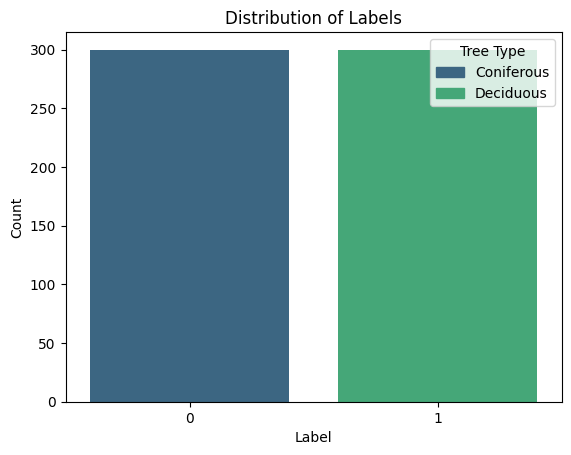

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot with 'label'
ax = sns.countplot(data=crowns_df, x='label', hue='label', palette='viridis', legend=False)

# Add a custom legend
legend_labels = {0: 'Coniferous', 1: 'Deciduous'}
handles = [plt.Rectangle((0, 0), 1, 1, color=ax.patches[i].get_facecolor()) for i in range(len(legend_labels))]
plt.legend(handles, legend_labels.values(), title="Tree Type")

# Set labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

---

# Set up Pytorch Dataset

In [8]:
class TreeCrownDataset(Dataset):
    def __init__(self, crowns_df, split, target_res=256, train_augmentations=[]):
        self.target_res = target_res
        self.split = split
        self.crowns_df = crowns_df
        self.train_augmentations = train_augmentations

        # Create a transform to resize and normalize the crown images
        self.transforms = [
            transforms.Resize((target_res, target_res)),
            transforms.ToTensor(),
        ]

        #Add additional transforms for data augmentation if using train dataset
        if self.split == 'train':
            self.transforms.extend(self.train_augmentations)

        # Build transform pipeline
        self.transforms = transforms.Compose(self.transforms)


    def __len__(self):
        return len(self.crowns_df)

    def __getitem__(self, idx):

        target_crown = self.crowns_df.iloc[idx]

        label = torch.tensor(target_crown['label']).long()

        crown_img = Image.open(target_crown['fpath']).convert('RGB')

        crown_tensor = self.transforms(crown_img)

        crown_id = target_crown['crown_id']

        return crown_tensor, label, crown_id

---

# Set up the Lightning Data Module

In [9]:
class TreeCrownDataModule(L.LightningDataModule):
    def __init__(self, crowns_df, batch_size=32, train_augmentations=[]):
        super().__init__()
        self.crowns_df = crowns_df
        self.batch_size = batch_size

    def setup(self, stage=None):

        #Split data into three dataframes for train/val/test
        train_val_df, self.test_df = train_test_split(self.crowns_df,
                                                      test_size=0.15,
                                                      random_state=42)

        self.train_df, self.val_df = train_test_split(train_val_df,
                                                      test_size=0.17,
                                                      random_state=42)

        #Report dataset sizes
        for name, df in [("Train", self.train_df),
                         ("Val", self.val_df),
                         ("Test", self.test_df)]:

            print(f"{name} dataset size: {len(df)}",
                  f"({round(len(df)/len(crowns_df)*100, 0)}%)")

        # Instantiate datasets
        self.train_dataset = TreeCrownDataset(self.train_df, split='train')

        self.val_dataset = TreeCrownDataset(self.val_df, split='val')

        self.test_dataset = TreeCrownDataset(self.test_df, split='test')

    def train_dataloader(self):
        return DataLoader(self.train_dataset,
                          batch_size=self.batch_size,
                          shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_dataset,
                          batch_size=self.batch_size,
                          shuffle=False)

    def predict_dataloader(self):
        return DataLoader(self.test_dataset,
                          batch_size=self.batch_size,
                          shuffle=False
                          )

#Set the training data augmentations
train_augmentations = [
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation([-90, 90]),
                transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0))
                ]

# Test the datamodule
crowns_datamodule = TreeCrownDataModule(crowns_df, train_augmentations=train_augmentations)
crowns_datamodule.setup()

# Test loading a sample
sample = crowns_datamodule.train_dataset[0]
print(sample[0].shape)
print(sample[1])

Train dataset size: 423 (70.0%)
Val dataset size: 87 (14.0%)
Test dataset size: 90 (15.0%)
torch.Size([3, 256, 256])
tensor(0)


---

# Set up The Convolutional Neural Network (CNN)

In [10]:
class CNN(L.LightningModule):
    def __init__(self, lr, pretrained_weights=True):
        super(CNN, self).__init__()

        self.model = resnet50(weights=ResNet50_Weights.DEFAULT if pretrained_weights else None) # IMAGENET1K_V2 vs. random init

        # Modify the final fc layer of model to output a single value for binary classification
        self.model.fc = nn.Linear(self.model.fc.in_features, 1)

        #Add sigmoid activation to the end model
        self.model = nn.Sequential(self.model, nn.Sigmoid())

        self.criterion = nn.BCELoss()

        self.lr = lr

        self.save_hyperparameters()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y, _ = batch
        y_hat = self(x).squeeze()
        loss = self.criterion(y_hat, y.float())
        self.log('train_loss', loss, on_epoch=True, on_step=False)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y, _ = batch
        y_hat = self(x).squeeze()
        loss = self.criterion(y_hat, y.float())
        self.log('val_loss', loss, on_epoch=True, on_step=False)
        return loss

    def predict_step(self, batch, batch_idx):
        x, y, id = batch
        y_hat = self(x).squeeze()

        return y_hat, y, id

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer

In [15]:
#Instantiate the model with 1 class (present/absent)
model = CNN(lr=0.0001)
print(model)

#Try passing some data through the model
batch, labels, ids = next(iter(crowns_datamodule.train_dataloader()))

# Pass batch through the model
y_hat = model(batch)

print("\nCrown IDs:\n", ids)

print("\nImage batch shape:\n", batch.shape)

print("\nOutput tensor shape:\n", y_hat.shape)

#View the predicted class probabilities
print("\nPredicted class probabilities:\n",
      y_hat.detach().cpu().numpy().squeeze())

CNN(
  (model): Sequential(
    (0): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
   

---

# Set up Lightning Trainer

In [16]:
# put together
crowns_datamodule = TreeCrownDataModule(crowns_df, train_augmentations=[])
crowns_datamodule.setup()
model = CNN(lr=0.0001)
tensorboard_logger = TensorBoardLogger('', name='lightning_logs', version=0)
csv_logger = CSVLogger('', name='logs', version=0)
trainer = L.Trainer(max_epochs=2, logger=[tensorboard_logger, csv_logger], devices=1)

Train dataset size: 423 (70.0%)
Val dataset size: 87 (14.0%)
Test dataset size: 90 (15.0%)


INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


## Fit the model

In [17]:
trainer.fit(model, datamodule=crowns_datamodule)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory lightning_logs/version_0/checkpoints exists and is not empty.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type       | Params | Mode 
-------------------------------------------------
0 | model     | Sequential | 23.5 M | train
1 | criterion | BCELoss    | 0      | train
-------------------------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
94.040    Total estimated model params size (MB)
154       Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type       | Params | Mode 
-------------------------------------------------
0 | model     | Sequential | 23.5 M | train
1 | criterion | BCELoss    | 0      | train
-------------------------------

Train dataset size: 423 (70.0%)
Val dataset size: 87 (14.0%)
Test dataset size: 90 (15.0%)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (14) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=2` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


---

# Visualize learning curve

In [18]:
# Read the logs CSV file after training
logs_df = pd.read_csv(csv_logger.log_dir + '/metrics.csv')
logs_df = logs_df.groupby('epoch').mean()  # merge the train and valid rows
logs_df['epoch'] = logs_df.index  # because "Epoch" gets turned into the index
logs_df.index.name = ''  # to remove the name "Epoch" from the index

# Display the logs
print(logs_df)

   step  train_loss  val_loss  epoch
                                    
0  13.0    0.597863  0.544743      0
1  27.0    0.338393  0.363463      1


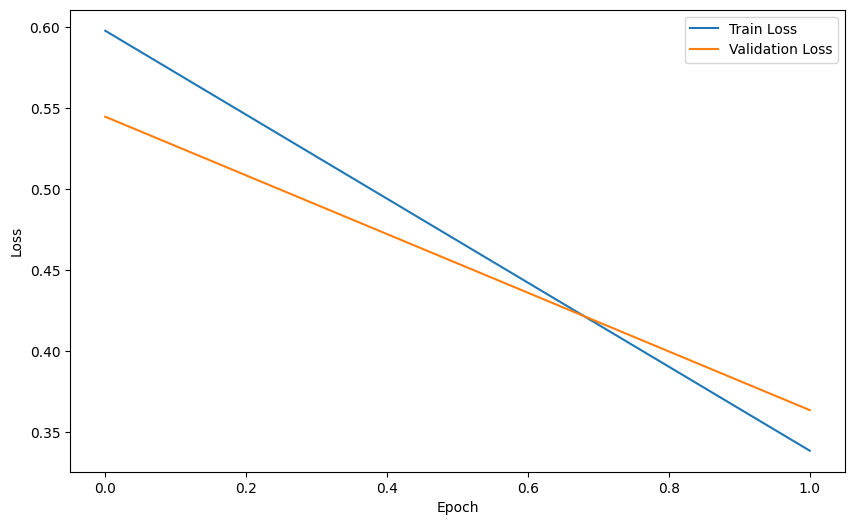

In [19]:
#Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(logs_df['train_loss'], label='Train Loss')
plt.plot(logs_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
def calc_test_oa():
    #Test the model on the test set
    out = trainer.predict(model, datamodule=crowns_datamodule, return_predictions=True)

    # Separate predictions and targets from output
    pred_class_probs = np.concatenate([batch[0] for batch in out])
    obs = np.concatenate([batch[1] for batch in out])
    ids = np.concatenate([batch[2] for batch in out])

    #Convert to obs-pred dataframe
    test_df = pd.DataFrame({'obs': obs, 'pred_class_probs': pred_class_probs, 'crown_id': ids})

    #Convert class probabilities to binary predictions
    test_df['pred_boolean_class'] = (test_df['pred_class_probs'] > 0.5)

    #Convert binary predictions to integers
    test_df['pred'] = test_df['pred_boolean_class'].astype(int)

    #Add a column for correct/incorrect predictions
    test_df['correct'] = test_df['obs'] == test_df['pred']

    #Join with crowns_df
    test_df = test_df.merge(crowns_df, on='crown_id', how='left')

    #Calculate overall accuracy using sklearn
    overall_acc = sklearn.metrics.accuracy_score(y_true=test_df['obs'], y_pred=test_df['pred'])


    #Check how many crowns were classified correctly
    n_correct = len(test_df[test_df['correct'] == True])

    print(f"Summary: {n_correct} / {len(test_df)} crowns were classified correctly.")
    return overall_acc, test_df

In [21]:
overall_acc, test_df = calc_test_oa()
print(f"Overall accuracy: {overall_acc:.2f}")

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Train dataset size: 423 (70.0%)
Val dataset size: 87 (14.0%)
Test dataset size: 90 (15.0%)


Predicting: |          | 0/? [00:00<?, ?it/s]

Summary: 72 / 90 crowns were classified correctly.
Overall accuracy: 0.80


{'coniferous': 0, 'deciduous': 1}


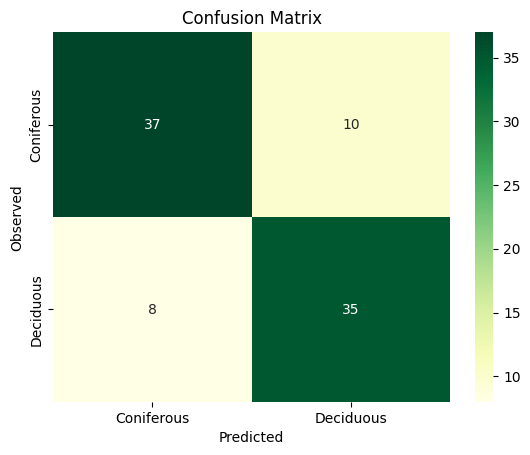

In [22]:
print(label_mapping)

#Generate a confusion matrix using seaborn
cm = confusion_matrix(y_true=test_df['obs'],
                      y_pred=test_df['pred'])

#Plot the confusion matrix
classes = ['Coniferous', 'Deciduous']
sns.heatmap(cm, annot=True,
            cmap='YlGn',
            xticklabels=classes,
            yticklabels=classes)


plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Confusion Matrix')
plt.show()




Incorrectly classified coniferous crowns.



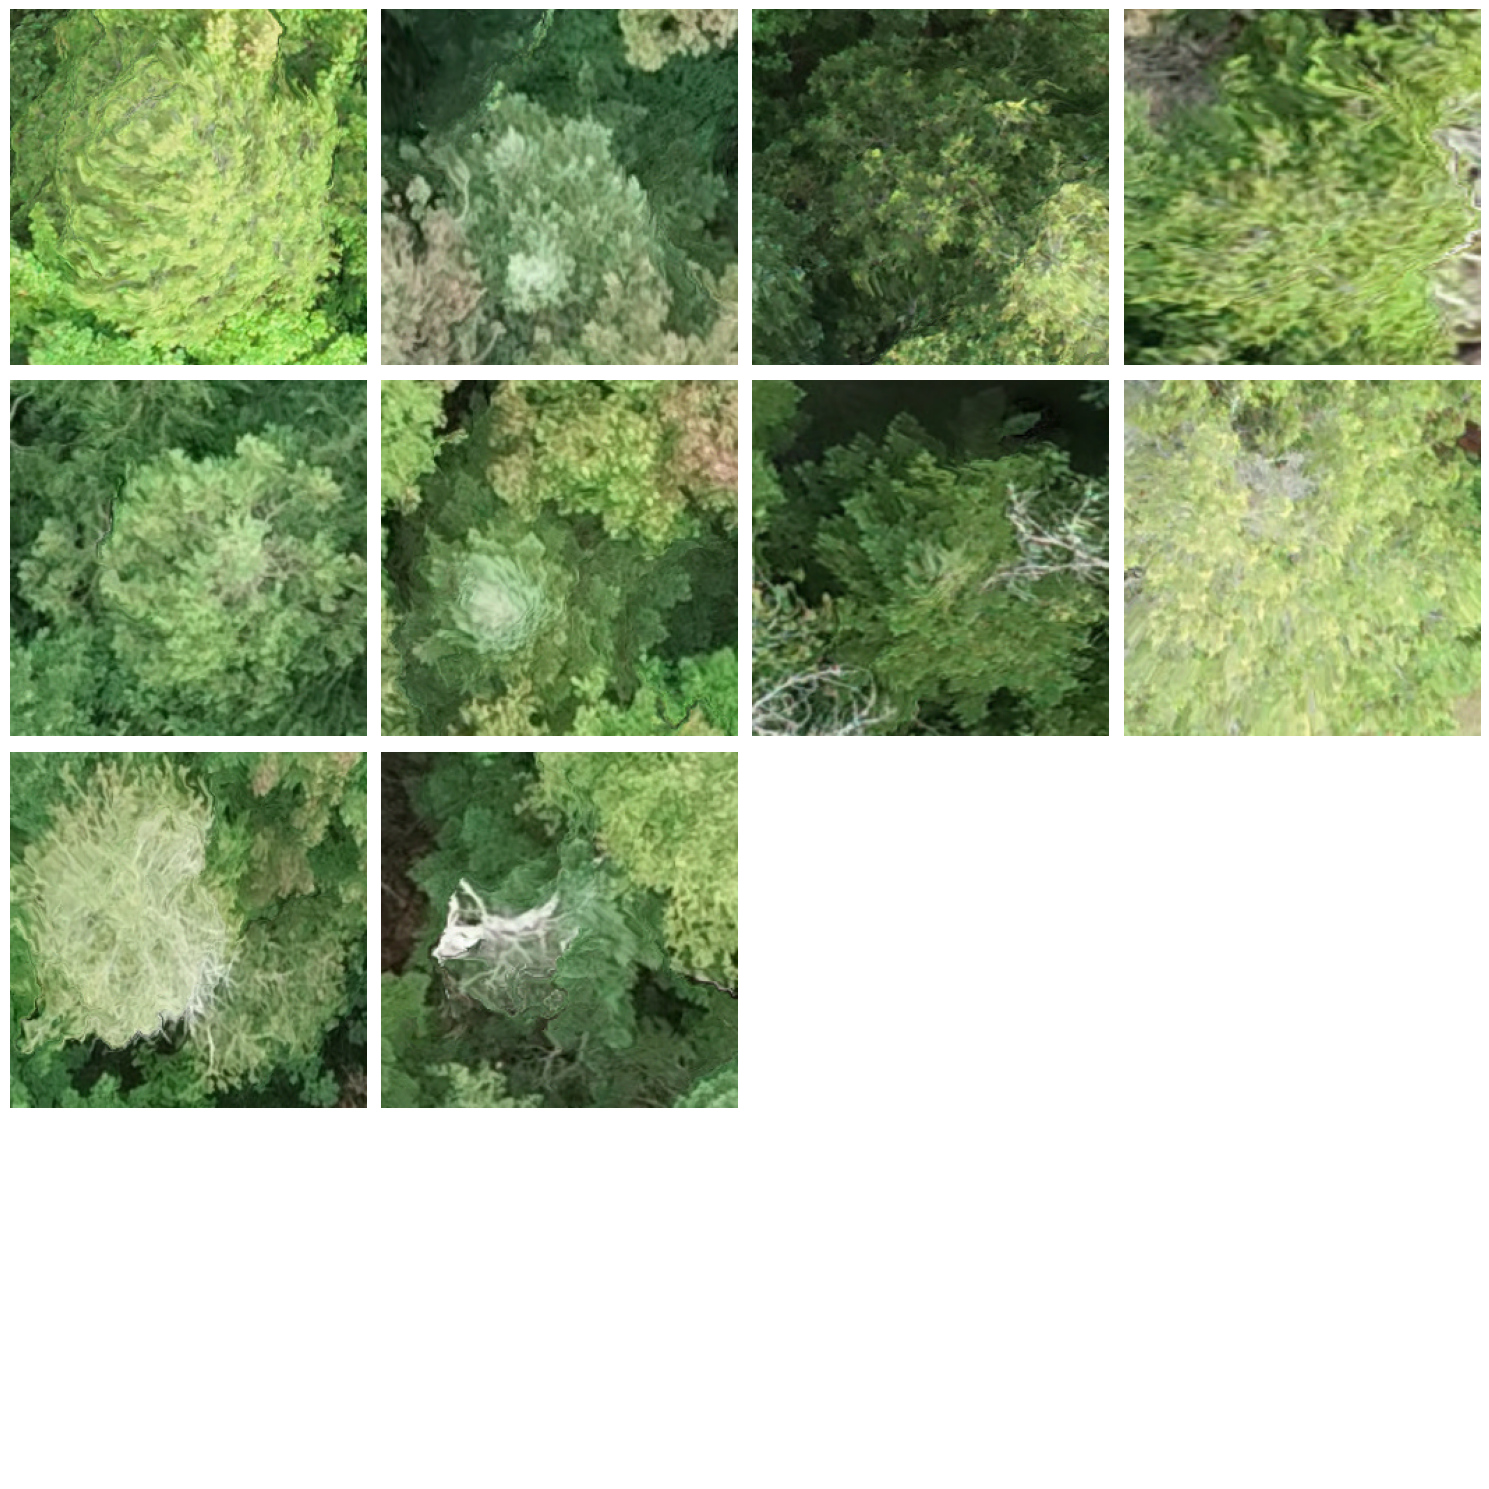


Incorrectly classified deciduous crowns.



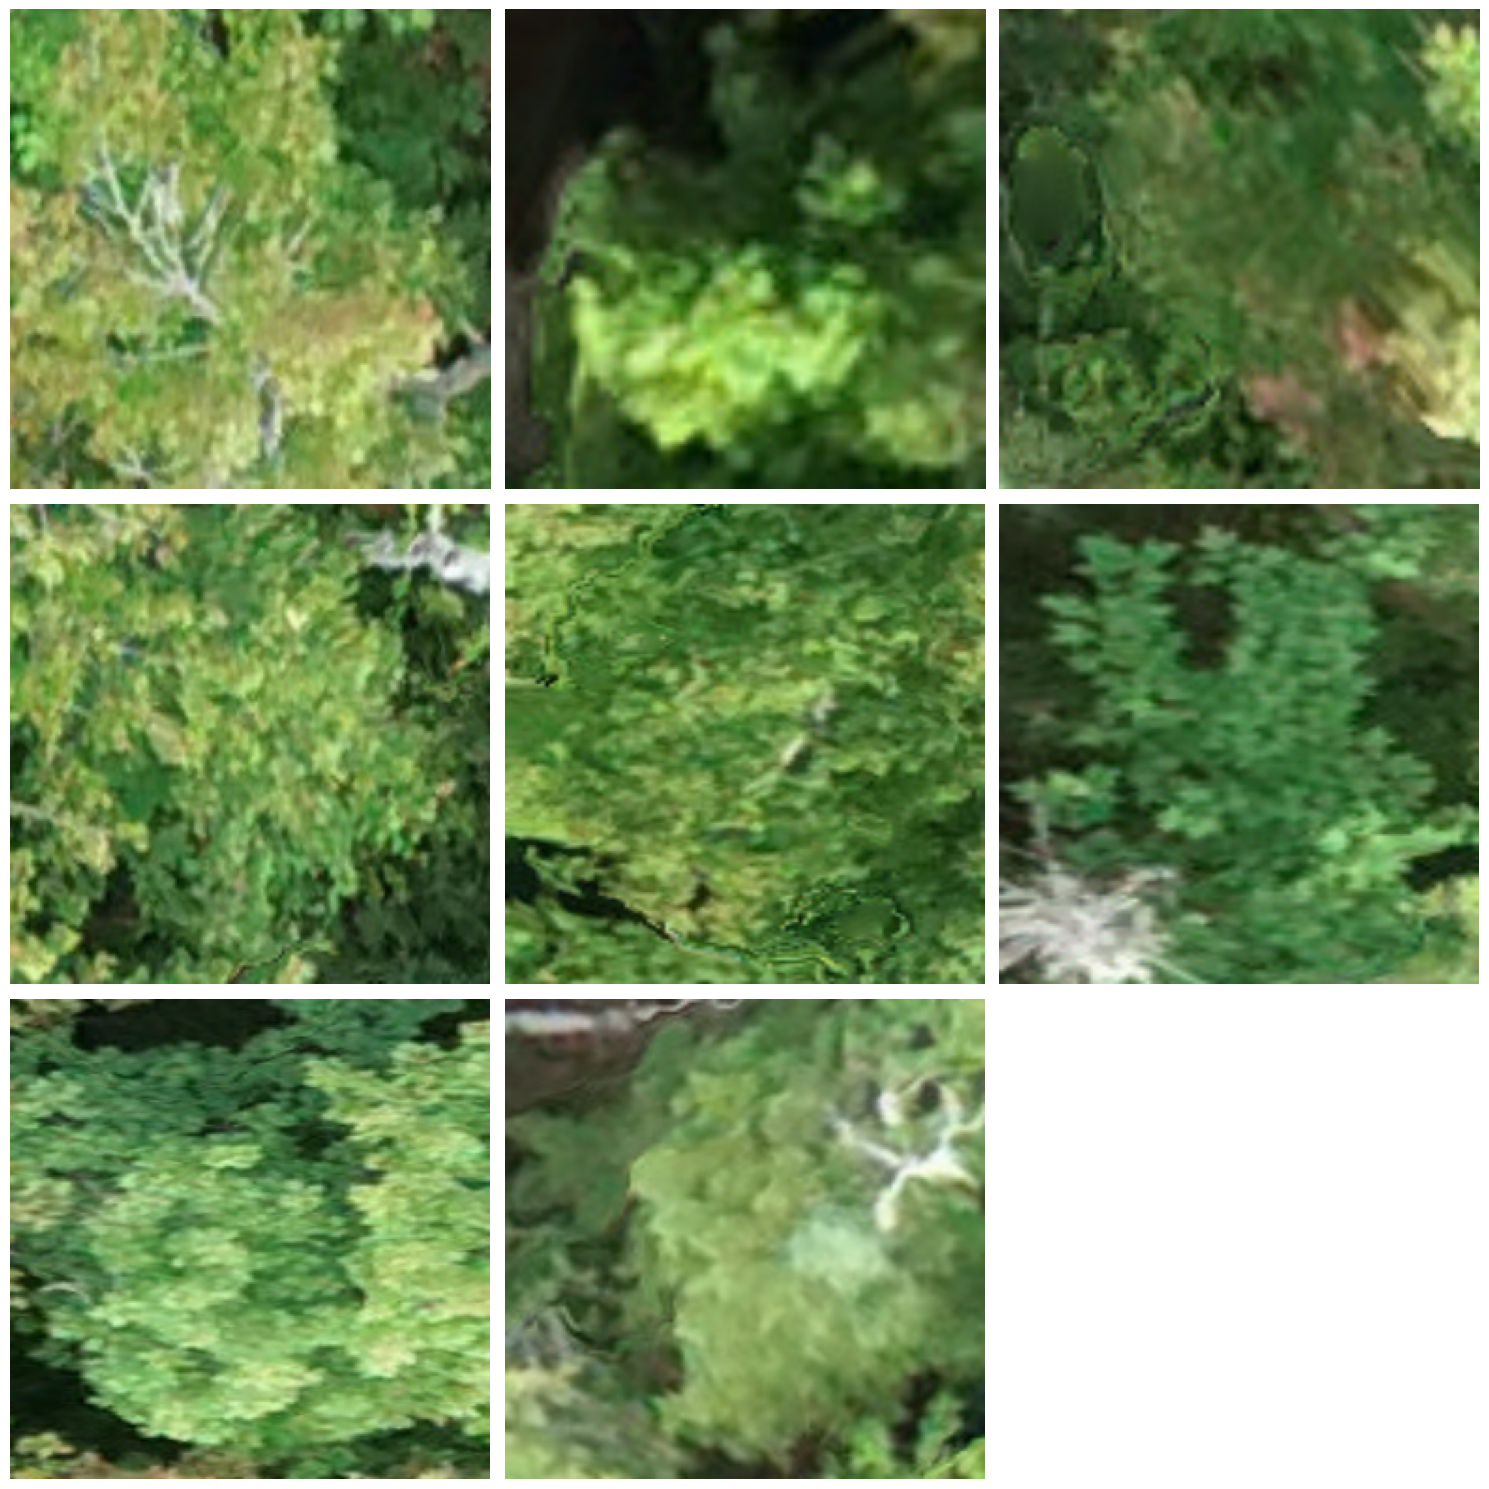

In [23]:
# Let's view the incorrectly classified crowns
incorrect_df = test_df[test_df['correct'] == False]

#Plot incorrecty classified coniferous/deciduous crowns

for c_type in test_df['species_type'].unique():

    print(f"\nIncorrectly classified {c_type} crowns.\n")

    # Filter the incorrect crowns by species type
    incorrect_type_df = test_df[(test_df['correct'] == False) & (test_df['species_type'] == c_type)]

    # Number of images
    num_images = len(incorrect_type_df)

    # Determine the grid size
    grid_size = int(num_images**0.5) + 1

    # Create a figure and axes
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Read the incorrect crown files and plot them
    for ax, fpath in zip(axes, incorrect_type_df['fpath']):
        img = Image.open(fpath)
        ax.imshow(img)
        ax.axis('off')

    # Hide any remaining empty subplots
    for ax in axes[num_images:]:
        ax.axis('off')

    plt.tight_layout()

    plt.show()

---

# Tune hyperparameters

Forget about ML for a second. Imagine you are baking a cookie. You have 3 things you can change about the cookie:

- Sugar type (white, brown, cane)
- Baking time (15 minutes, 30 minutes)
- Cooking temperature (360, 400 degrees)

There are 12 possible variations of cookies you can make. One of them will be the most delicious.

To find out which cookie tastes the best, you need to make all variations and assign a score
- 🤢
- 🤔
- 😆
- 😍

This is called a hyperparameter tune. Your three hyperparameters are sugar, baking time, cooking temperature.

```
python make_cookie.py --sugar 'white' --baking_time 15 --temperature 400
python make_cookie.py --sugar 'brown' --baking_time 15 --temperature 400

```

### Try it yourself! Tune the parameters and observe the impact.

- pretrained weights
- learning ragtes
- data augmentation

In [ ]:
# TASK 1: Initialize Data Module


# Logging
csv_logger = CSVLogger("logs", name="csv_logs")
tensorboard_logger = TensorBoardLogger("lightning_logs", name="tb_logs")

# TASK 2: Define Model with Tunable Parameters


# Trainer Configuration
trainer = L.Trainer(
    max_epochs=10,  # Modify number of epochs
    logger=[csv_logger, tensorboard_logger],
    devices=1  # Adjust based on available hardware
)

# TASK 3: Training

# print result
overall_acc, test_df = calc_test_oa()
print(f"Overall accuracy: {overall_acc:.2f}")

In [ ]:
# Ref
# TASK 1: Initialize Data Module
crowns_datamodule = TreeCrownDataModule(crowns_df, train_augmentations=[])
crowns_datamodule.setup()

# Logging
csv_logger = CSVLogger('', name='logs', version=1)
tensorboard_logger = TensorBoardLogger('', name='lightning_logs', version=1)

# TASK 2: Define Model with Tunable Parameters
model = CNN(lr=0.01, pretrained_weights=False)

# Trainer Configuration
trainer = L.Trainer(
    max_epochs=10,  # Modify number of epochs
    logger=[csv_logger, tensorboard_logger],
    devices=1  # Adjust based on available hardware
)
trainer = L.Trainer(max_epochs=10, logger=[csv_logger, tensorboard_logger], devices=1)

# TASK 3: Training
trainer.fit(model, datamodule=crowns_datamodule)

# print result
overall_acc, test_df = calc_test_oa()
print(f"Overall accuracy: {overall_acc:.2f}")

---

🏄🏽‍♀️ **what combination of parameters produces the best performing model?**

The definition of "best" depends on the work you are doing. In general, "best" refers to the lowest loss.

If we run this training script with different hyperparameter combinations, it produces different loss curves

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=lightning_logs/

---

# Save/Depoly your model

In [ ]:
trainer.save_checkpoint(filepath=".ckpt/model.ckpt")

In [ ]:
model = CNN.load_from_checkpoint(".ckpt/model.ckpt", lr=0.01)
model.freeze()

crowns_datamodule = TreeCrownDataModule(crowns_df, train_augmentations=[])
crowns_datamodule.setup()
test_predictions = trainer.predict(model, datamodule=crowns_datamodule)

In [ ]:
overall_acc, test_df = calc_test_oa()
print(f"Overall accuracy: {overall_acc:.2f}")

TorchScript allows you to serialize your models in a way that it can be loaded in non-Python environments. The LightningModule has a handy method to_torchscript() that returns a scripted module which you can save or directly use.

In [ ]:
script = model.to_torchscript()

# save for use in production environment
torch.jit.save(script, "ckpt/model.pt")

# use it
#Try passing some data through the model
batch, labels, ids = next(iter(crowns_datamodule.test_dataloader()))

scripted_module = torch.jit.load("ckpt/model.pt")
output = scripted_module(batch)

---

# Scale up your model/dataset

You can either make all cookies sequentially (which will take you 4.5 hours). Or you can get 12 kitchens and cook them all in parallel, and you'll know in 30 minutes.

If a kitchen is a GPU, then you need 12 GPUs to run each experiment to see which cookie is the best. The power of Lightning is the ability to run sweeps like this on 12 different GPUs (or 1,000 GPUs if you'd like) to get you the best version of a model fast.

Train on GPUs
The Trainer will run on all available GPUs by default. Make sure you’re running on a machine with at least one GPU. There’s no need to specify any NVIDIA flags as Lightning will do it for you.

In [ ]:
from lightning import Trainer

# run on one GPU
trainer = Trainer(accelerator="gpu", devices=1)
# run on multiple GPUs
trainer = Trainer(accelerator="gpu", devices=8)
# run on as many GPUs as available by default
trainer = Trainer(accelerator="auto", devices="auto", strategy="auto")

Train on Slurm Cluster

In [ ]:
# train.py
def main(args):
    model = CNN(args)

    trainer = Trainer(accelerator="gpu", devices=8, num_nodes=4, strategy="ddp")

    trainer.fit(model)


if __name__ == "__main__":
    args = ...  # you can use your CLI parser of choice, or the `LightningCLI` or using config.yaml
    # TRAIN
    main(args)

In [ ]:
%%writefile submit.sh
# (submit.sh)
#!/bin/bash -l

# SLURM SUBMIT SCRIPT
#SBATCH --nodes=4             # This needs to match Trainer(num_nodes=...)
#SBATCH --gres=gpu:8
#SBATCH --ntasks-per-node=8   # This needs to match Trainer(devices=...)
#SBATCH --mem=0
#SBATCH --time=0-02:00:00

# might need the latest CUDA
module load python/3.11 NCCL/2.4.7-1-cuda.10.0
# activate conda env
source activate $1

# run script from above
srun python3 train.py

In [ ]:
%%!
sbatch submit.sh

Or you can even parallel the baking procedure...

![image](https://shared.fastly.steamstatic.com/store_item_assets/steam/apps/448510/ss_2a35c15c78f06dd4f23dab8a1e1917a835d0062d.1920x1080.jpg?t=1741368176)

# wandb sweep

In [ ]:
import wandb

wandb.login()

In [ ]:
%%html
<iframe src="https://api.wandb.ai/links/ubc-yuwei-cao/ebnspmv1" style="border:none;height:1024px;width:100%">